In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.neighbors import NearestNeighbors

from saturation.distributions import *
from saturation.geometry import *
from saturation.plotting import *

### Showing areal density bug

In [2]:
def plot_circle(center: Location,
                radius: float,
                axes_subplot,
                fill: bool = False,
                color: str = 'black',
                lw: float = 1,
                antialiased: bool = True,
                alpha: float = 1,
                linestyle: str = "-"):
    """
    Plots the specified circle on the supplied subplot.
    """
    axes_subplot.add_patch(matplotlib.patches.Circle(center,
                                                     radius=radius,
                                                     color=color,
                                                     fill=fill,
                                                     lw=lw,
                                                     antialiased=antialiased,
                                                     alpha=alpha,
                                                     linestyle=linestyle
                                                    ))

In [3]:
dpi = 400
font_size = 24

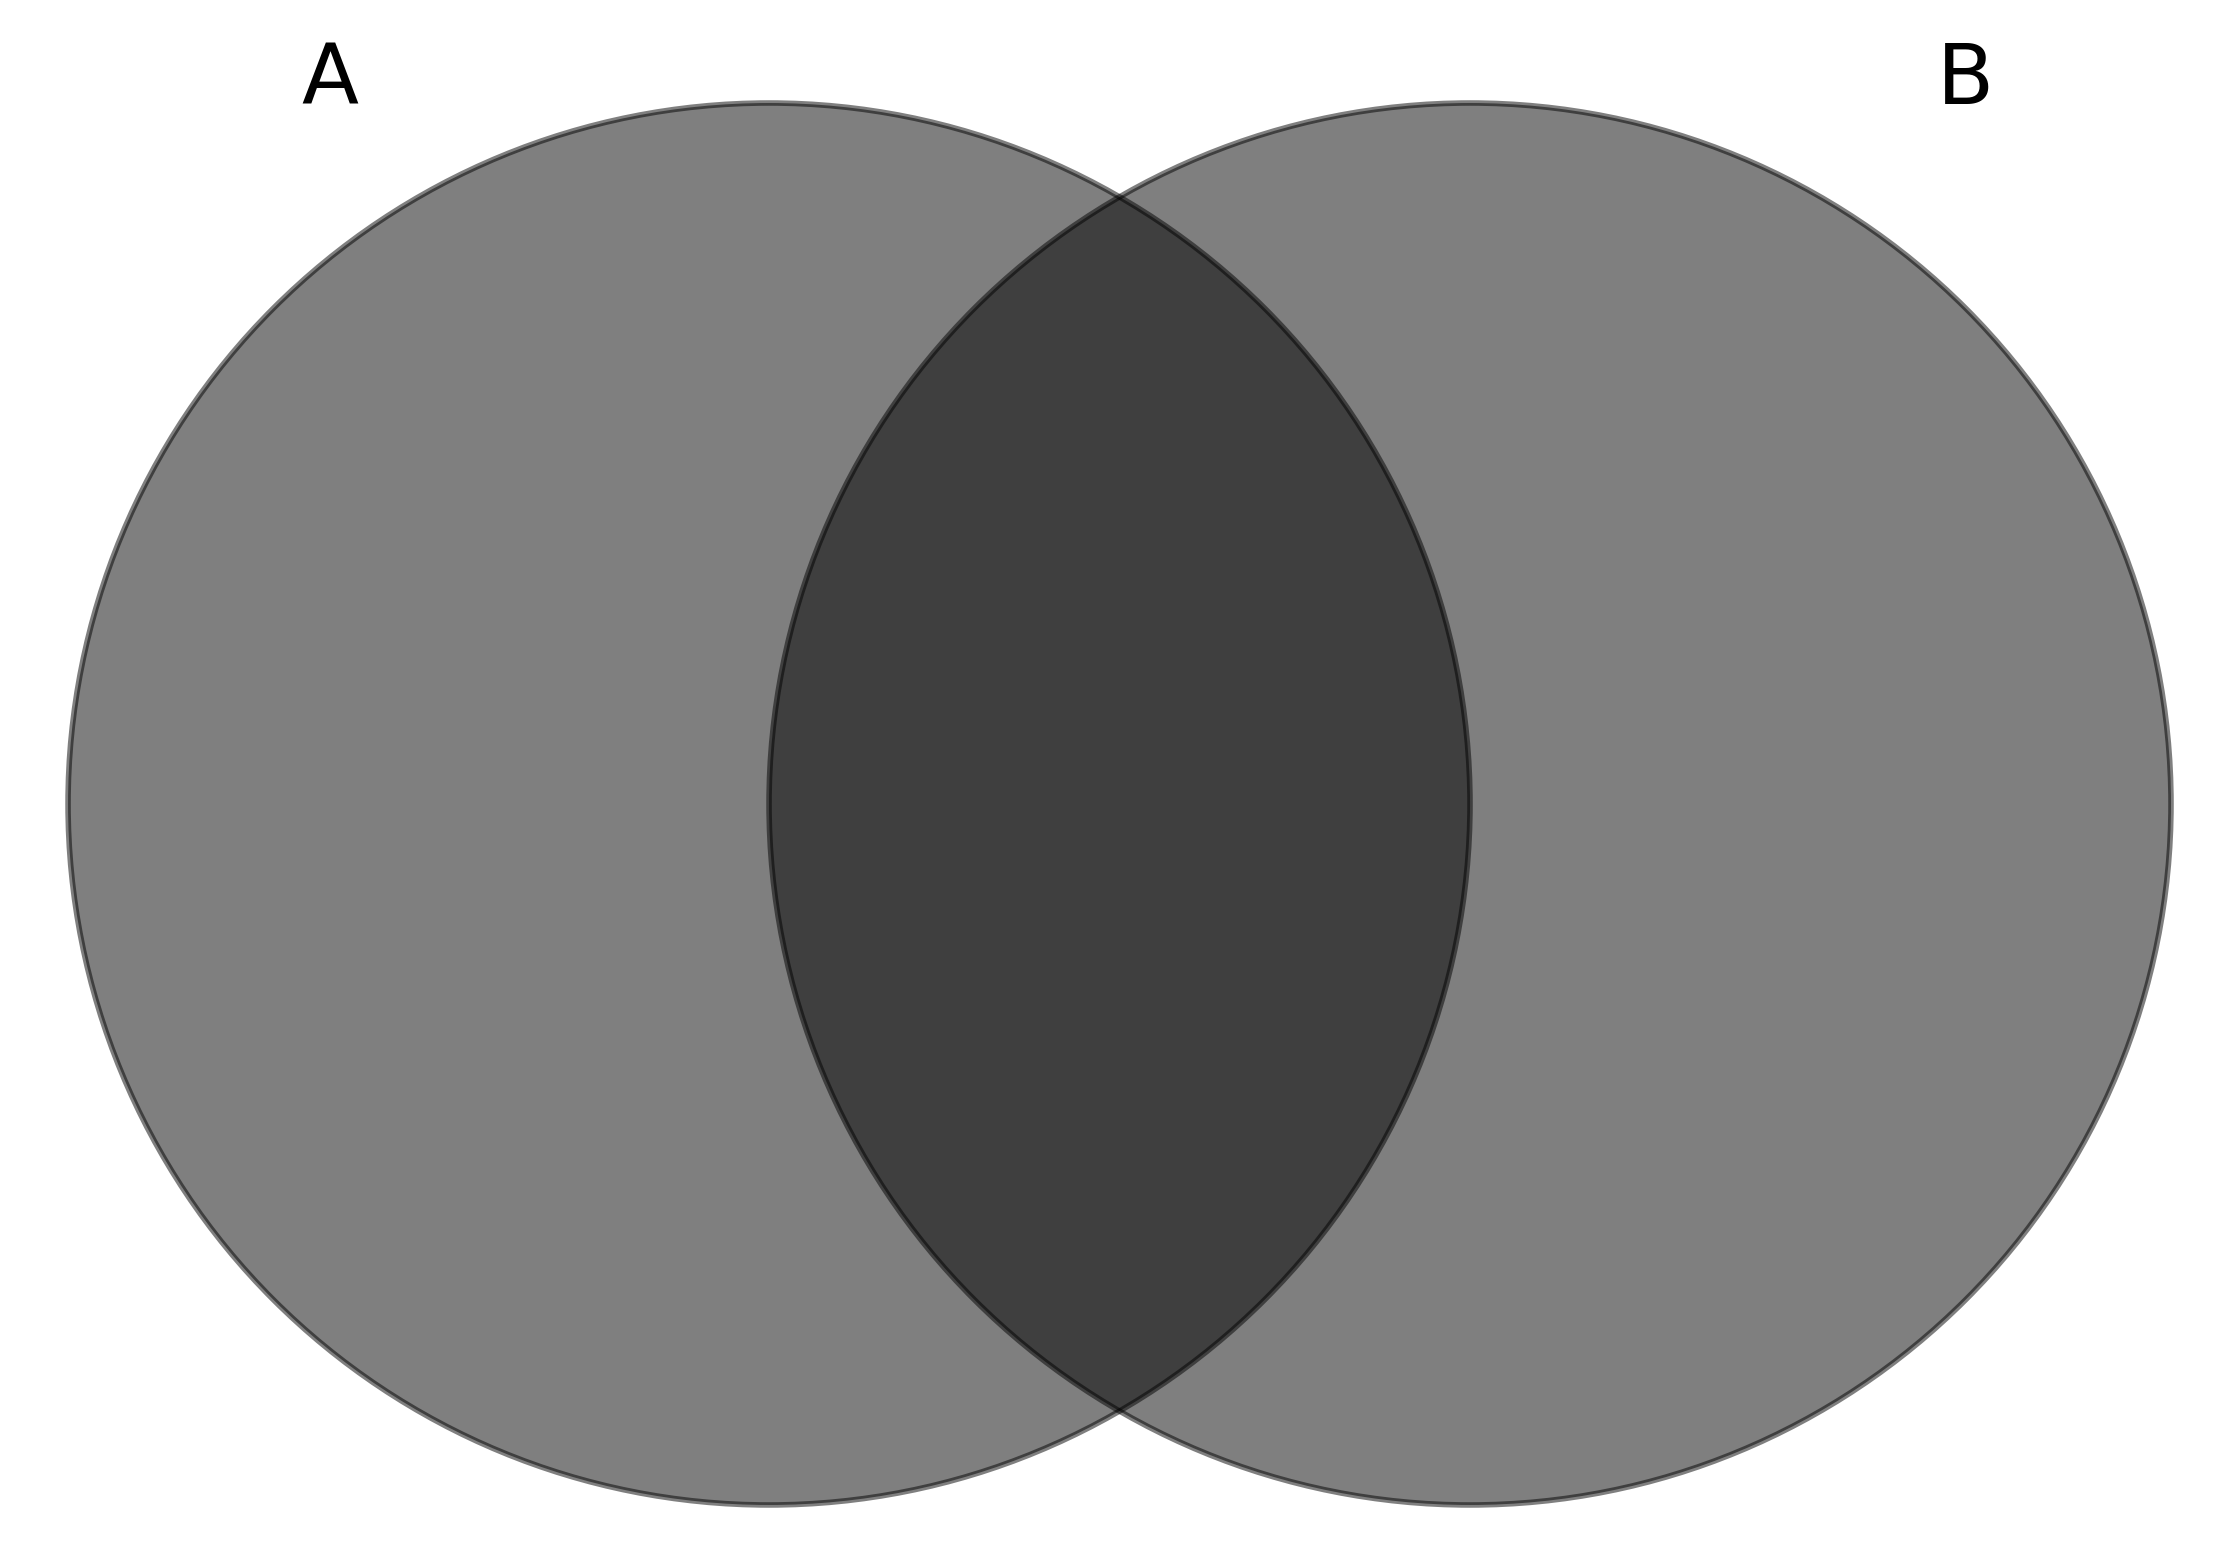

In [4]:
radius = 500

fig, ax = plt.subplots(figsize=(6, 4), dpi=dpi)
fig.set_tight_layout(True)

ax.set_xlim([-20, radius * 3 + 20])
ax.set_ylim([-10, radius * 2 + 10])
ax.set_aspect("equal")
ax.axes.set_axis_off()

craters = [
    (radius + radius, radius, radius, "black", .5, "-", True),
    (radius, radius, radius, "black", .5, "-", True),
]

for x, y, r, color, alpha, ls, fill in craters:
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
ax.text(radius / 3, radius * 2, "A", fontsize=15)
ax.text(radius * 8/3, radius * 2, "B", fontsize=15)
plt.savefig("figures/before_crater_removal.svg", pad_inches=0)
plt.show()

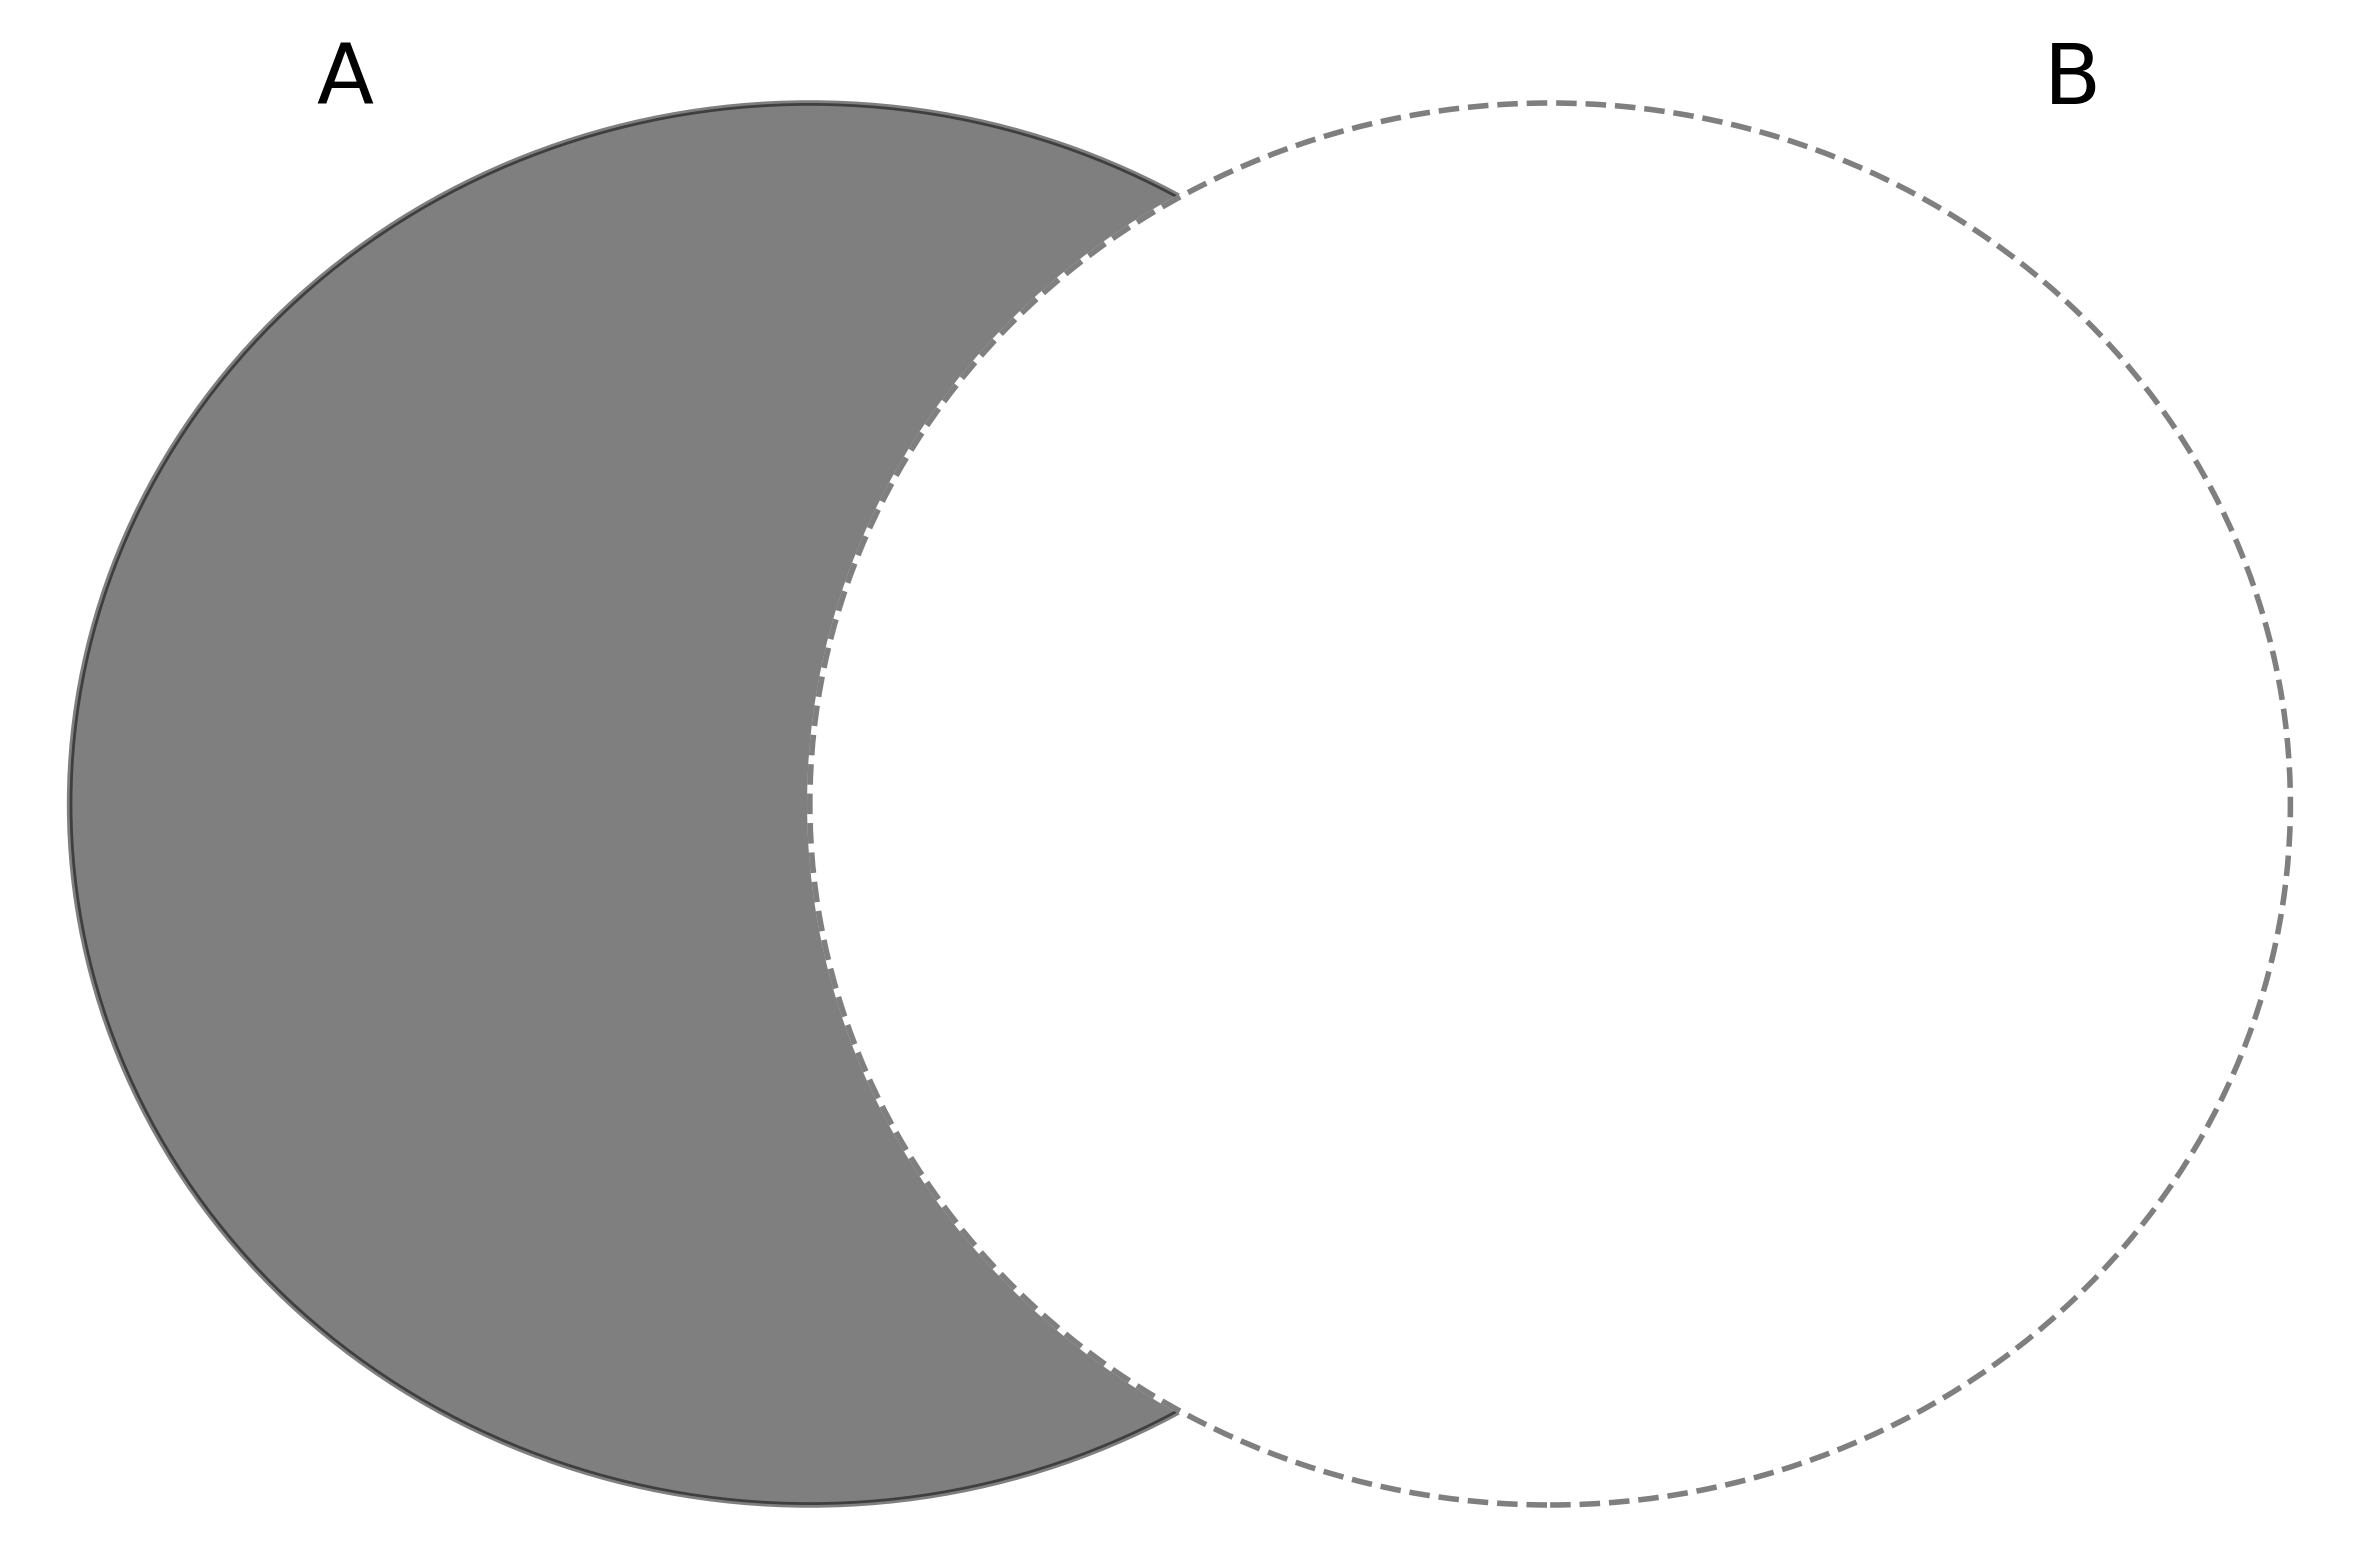

In [5]:
radius = 500

fig, ax = plt.subplots(figsize=(6, 4), dpi=dpi)
fig.set_tight_layout(True)

ax.set_xlim([-20, radius * 3 + 20])
ax.set_ylim([-10, radius * 2 + 10])
ax.axes.set_axis_off()

craters = [
    (radius, radius, radius, "black", .5, "-", True),
    (radius + radius, radius, radius, "white", 1, "-", True),
    (radius + radius, radius, radius, "black", .5, "--", False),
]

for x, y, r, color, alpha, ls, fill in craters:
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
ax.text(radius / 3, radius * 2, "A", fontsize=15)
ax.text(radius * 8/3, radius * 2, "B", fontsize=15)
plt.savefig("figures/after_crater_removal.svg", pad_inches=0)
plt.show()

### Distorted Z and Z_a calculations

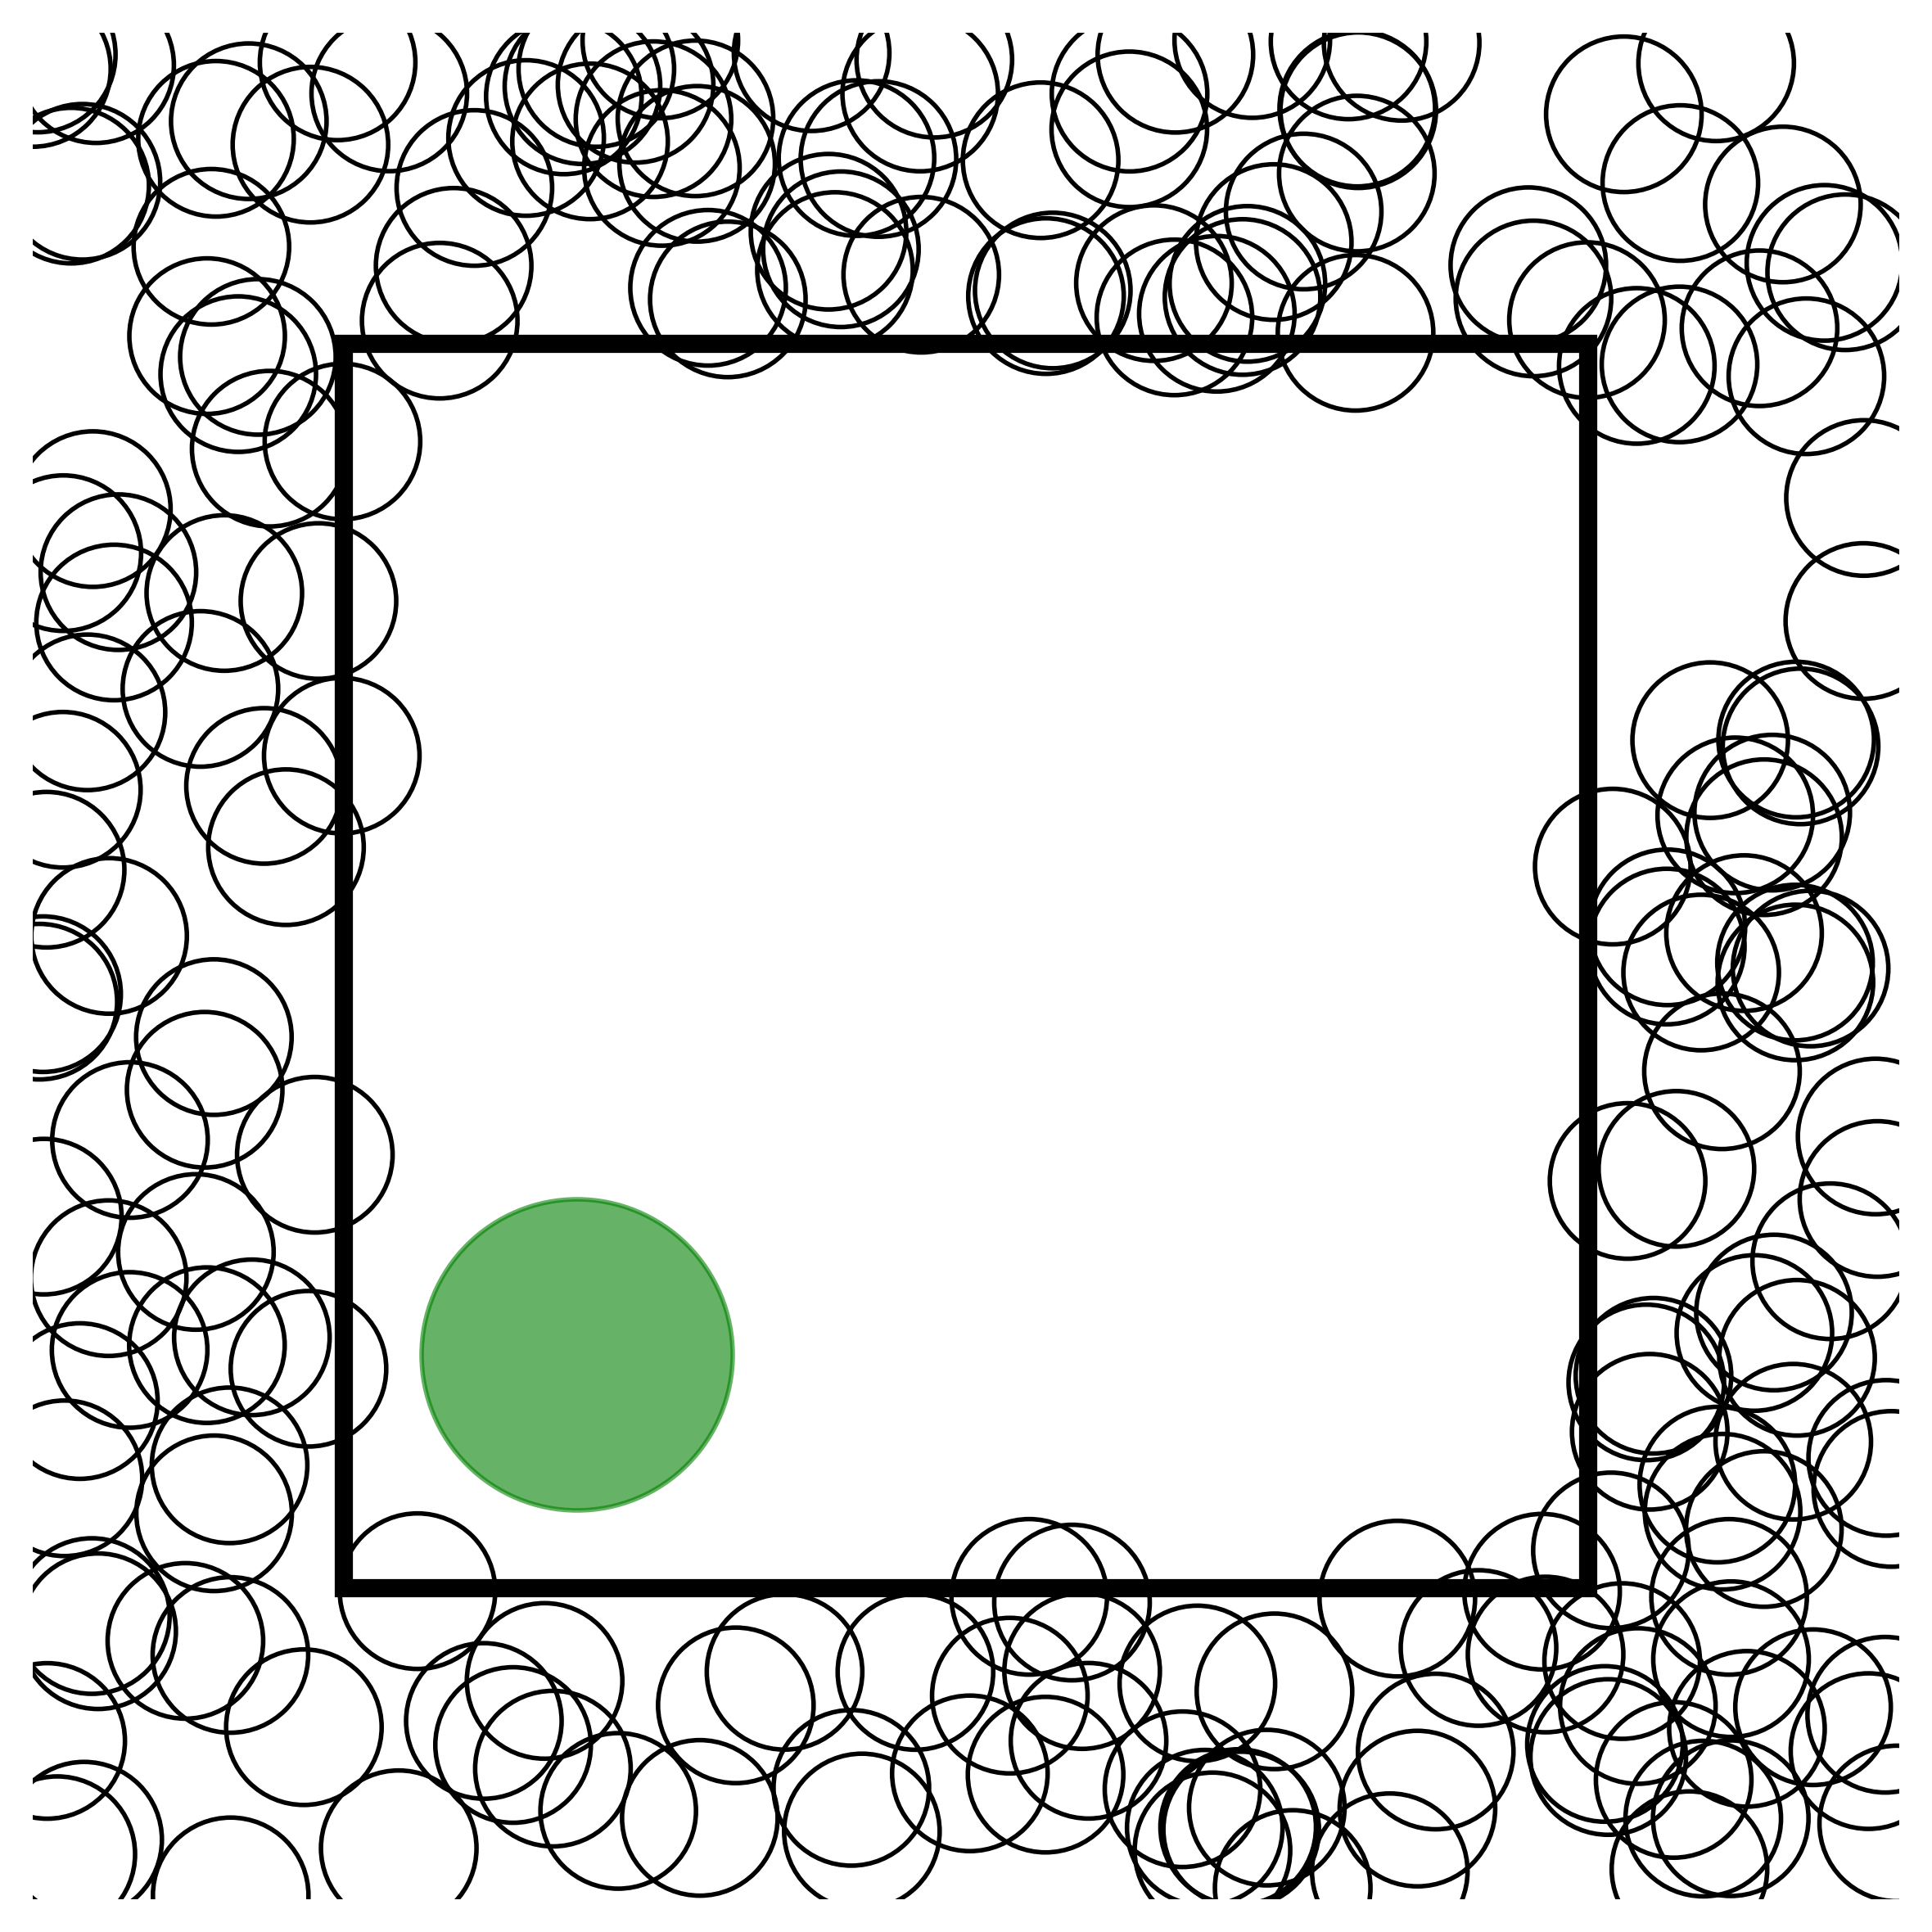

In [6]:
study_region_size = 800
study_region_padding = 200
radius = 50

fig, ax = plt.subplots(figsize=(6, 6), dpi=dpi)
fig.set_tight_layout(True)

total_region_size = study_region_size + 2 * study_region_padding

ax.set_xlim([0, total_region_size])
ax.set_ylim([0, total_region_size])
ax.axes.set_axis_off()

np.random.seed(123)
craters = [
    (x[0], x[1], radius, "black", 1, "-", False)
    for x in np.random.rand(1000, 2) * total_region_size
    if not (study_region_padding < x[0] < total_region_size - study_region_padding and study_region_padding < x[1] < total_region_size - study_region_padding)
][:200]

craters += [
    (study_region_padding + radius * 3, study_region_padding + radius * 3, radius * 2, "green", .6, "-", True)
]

for x, y, r, color, alpha, ls, fill in craters:
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
rectangle = matplotlib.patches.Rectangle((study_region_padding, study_region_padding), study_region_size, study_region_size,
                                         color="black",
                                         fill=False,
                                         lw=4)
ax.add_patch(rectangle)
    
plt.savefig("figures/edge_effects.svg", bbox_inches="tight", pad_inches=0)
plt.show()

### Approximation of rim removal in the IDL code

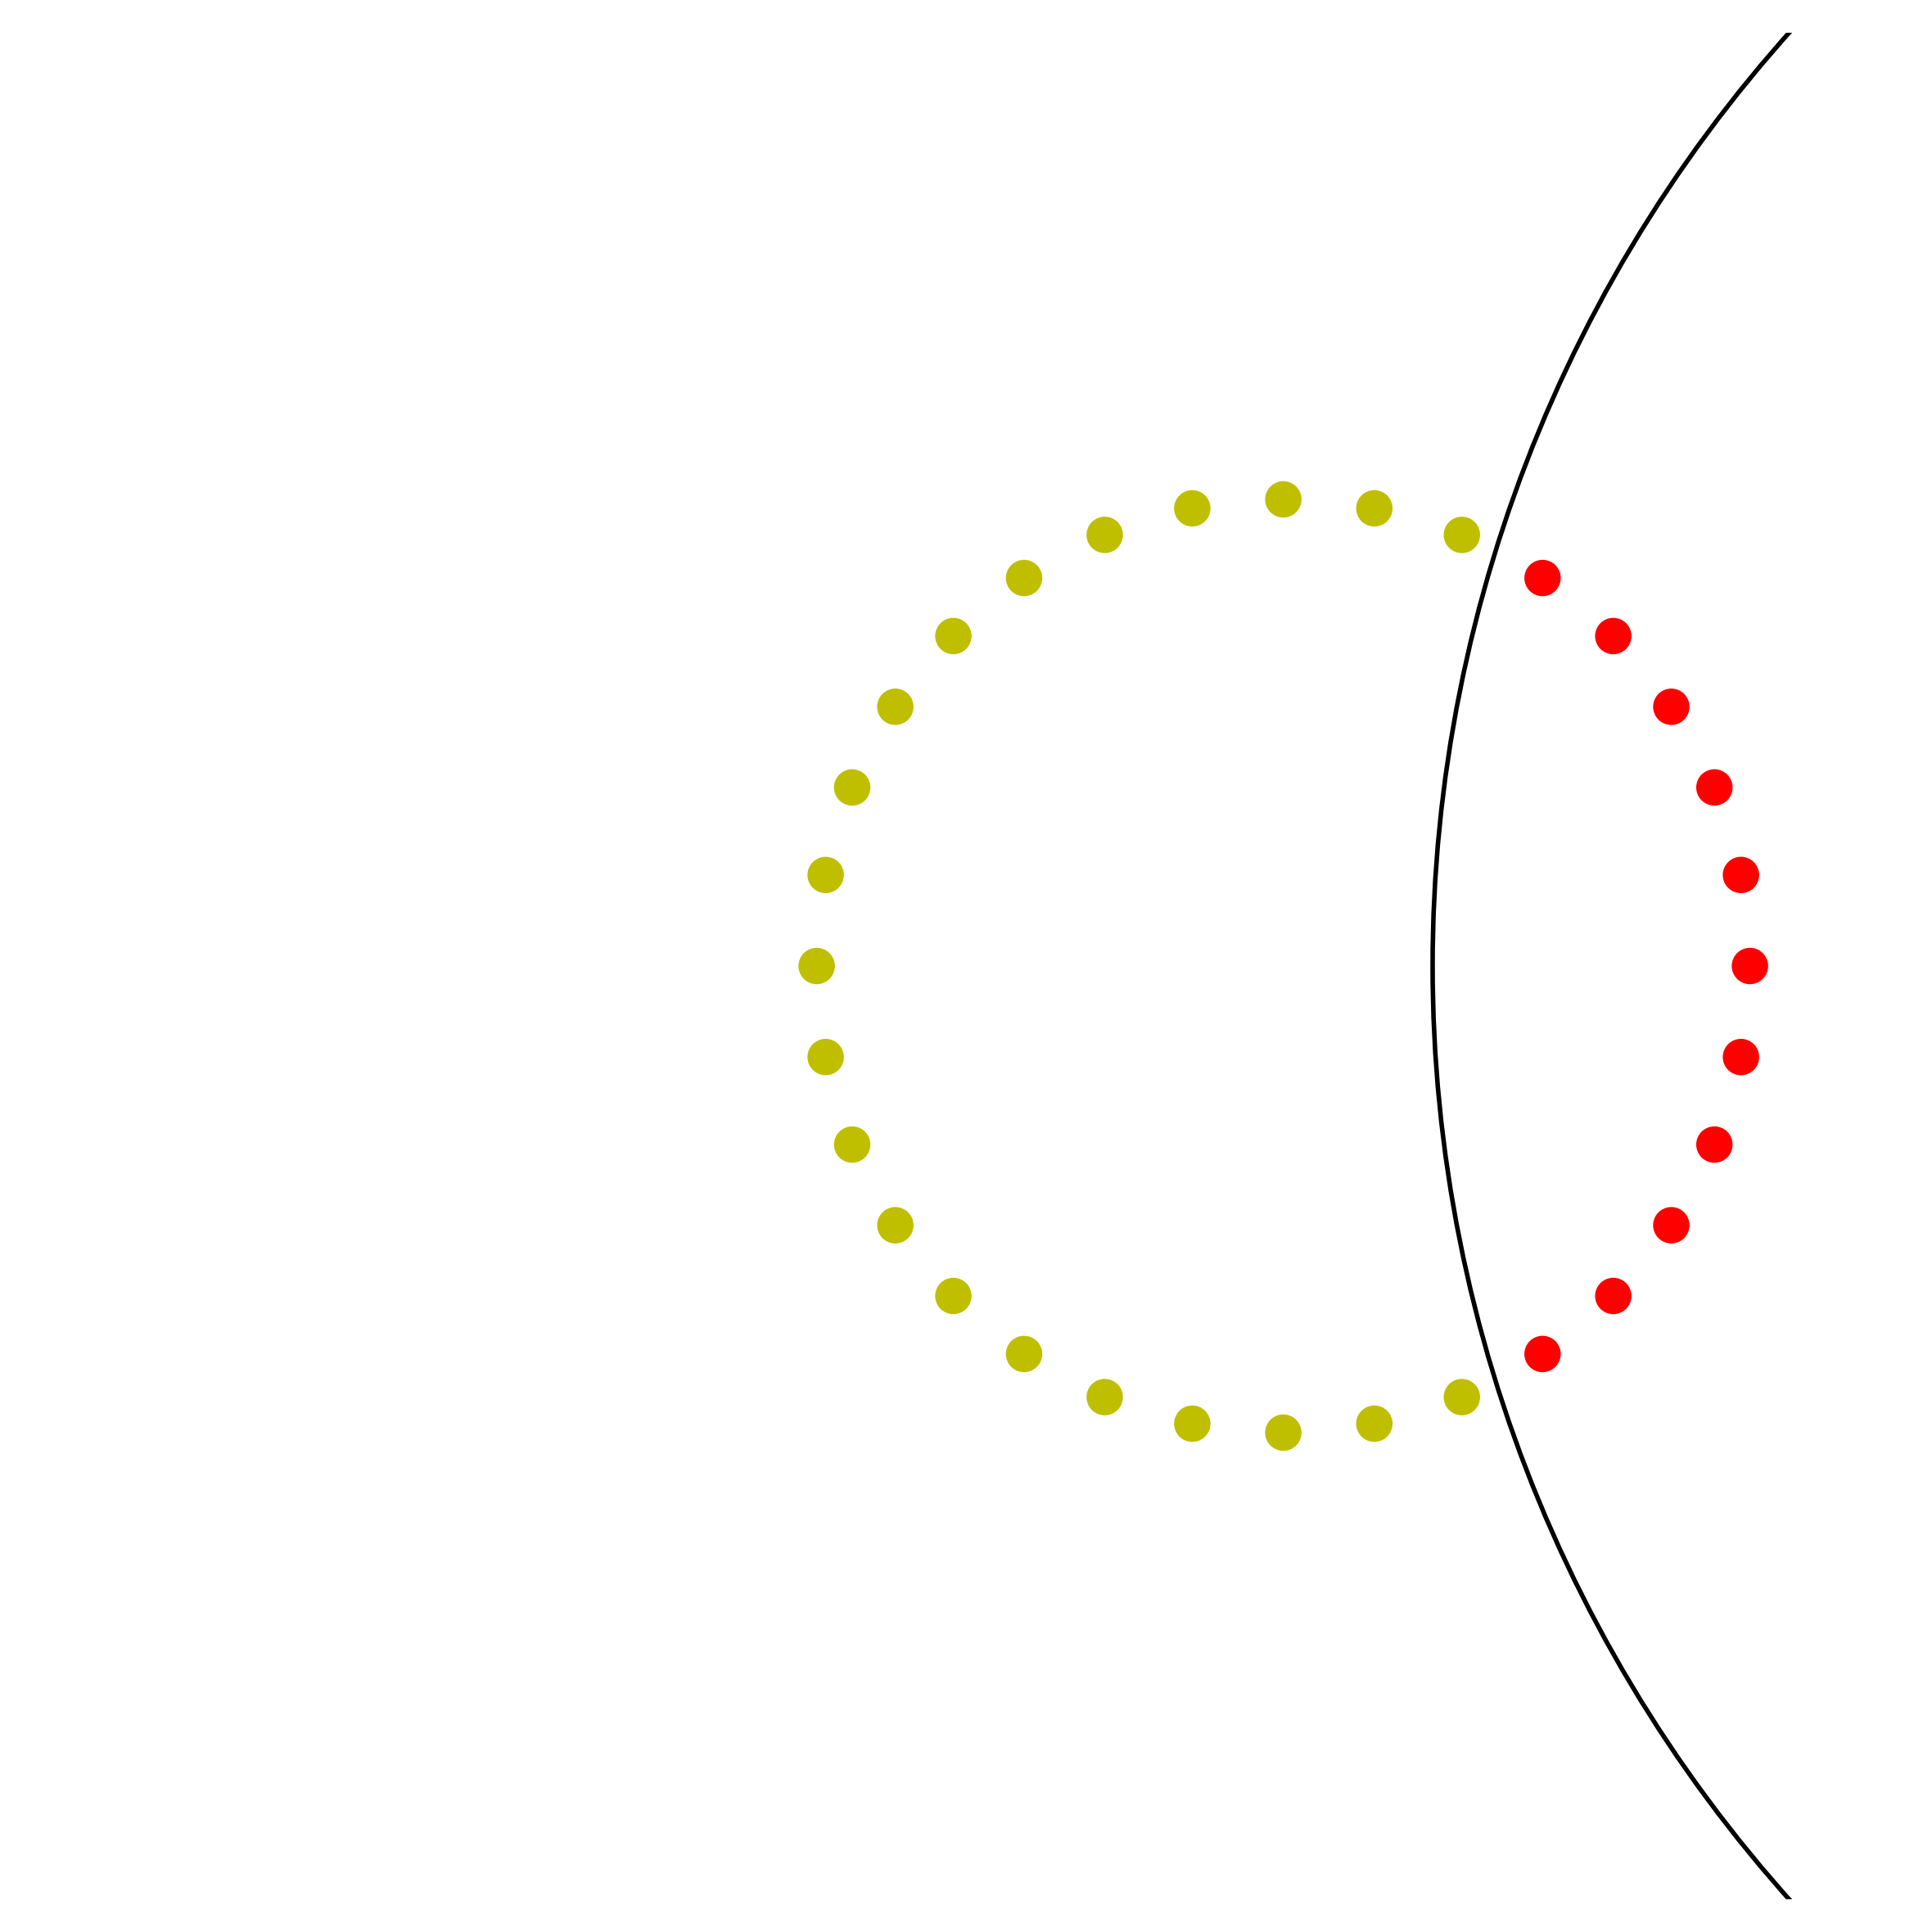

In [7]:
study_region_size = 1000

fig, ax = plt.subplots(figsize=(6, 6), dpi=dpi)
fig.set_tight_layout(True)

ax.set_xlim([0, study_region_size])
ax.set_ylim([0, study_region_size])
ax.axes.set_axis_off()

craters = [
    (study_region_size * 3 / 2, study_region_size / 2, study_region_size * .75, "black", 1, "-", False)
]

for x, y, r, color, alpha, ls, fill in craters:
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
x_points = []
y_points = []
radius = 250
n_points = 32
for n in range(n_points):
    x_points.append(radius * np.cos(n / n_points * 2 * np.pi) + study_region_size * .67)
    y_points.append(radius * np.sin(n / n_points * 2 * np.pi) + study_region_size / 2)
    
colors = ["r"] * 6 + ["y"] * 21 + ["r"] * 5
    
ax.scatter(x_points, y_points, c=colors, lw=2)
    
    
plt.savefig("figures/rim_removal_approximation.svg", bbox_inches="tight", pad_inches=0)
plt.show()

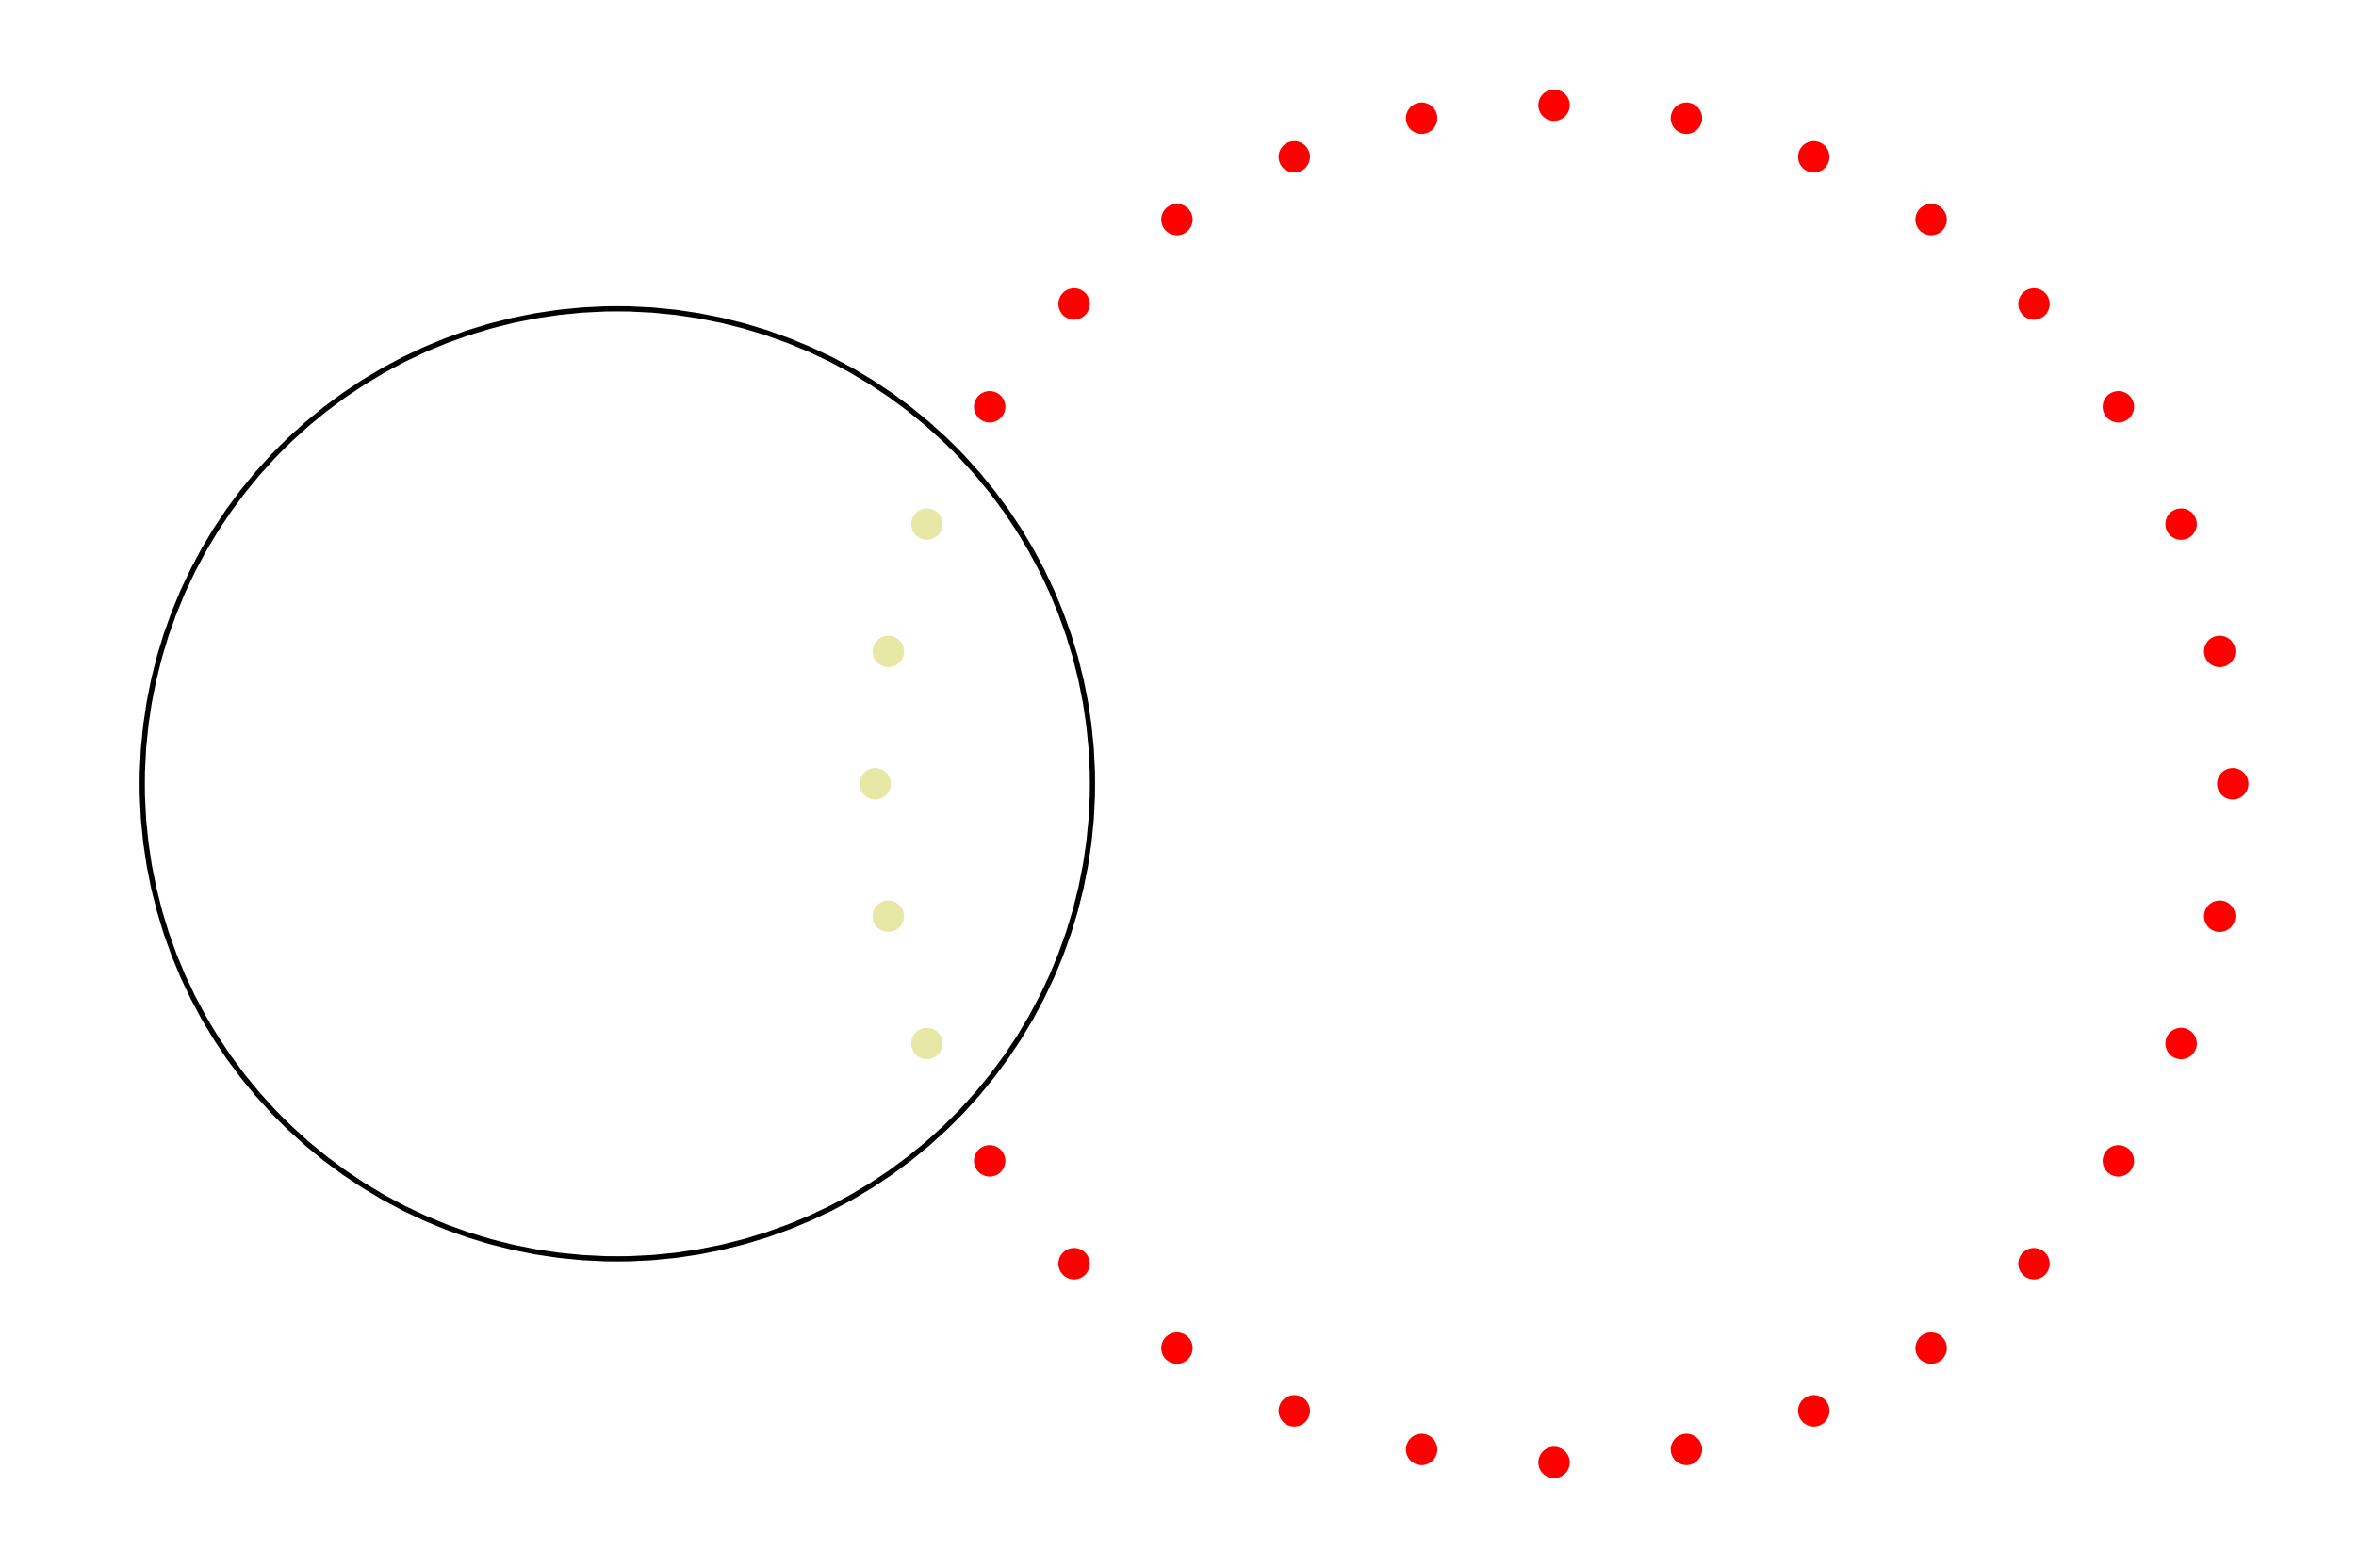

In [8]:
study_region_size = 1000

fig, ax = plt.subplots(dpi=400)
fig.set_tight_layout(True)

# ax.set_xlim([0, study_region_size])
# ax.set_ylim([0, study_region_size])
ax.set_aspect("equal")
ax.axes.set_axis_off()

craters = [
    (325, study_region_size / 2, study_region_size * .175, "black", 1, "-", False)
]

for x, y, r, color, alpha, ls, fill in craters:
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
x_points = []
y_points = []
radius = 250
n_points = 32
for n in range(n_points):
    x_points.append(radius * np.cos(n / n_points * 2 * np.pi) + study_region_size * .67)
    y_points.append(radius * np.sin(n / n_points * 2 * np.pi) + study_region_size / 2)
    
colors = ["r"] * 14 + ["y"] * 5 + ["r"] * 13
alpha = [1] * 14 + [0.35] * 5 + [1] * 13
    
ax.scatter(x_points, y_points, c=colors, lw=0, alpha=alpha)
        
plt.savefig("figures/rim_removal_approximation.svg", bbox_inches="tight", pad_inches=0)
plt.show()

### Demonstrating cookie-cutting and effective radius multiplier

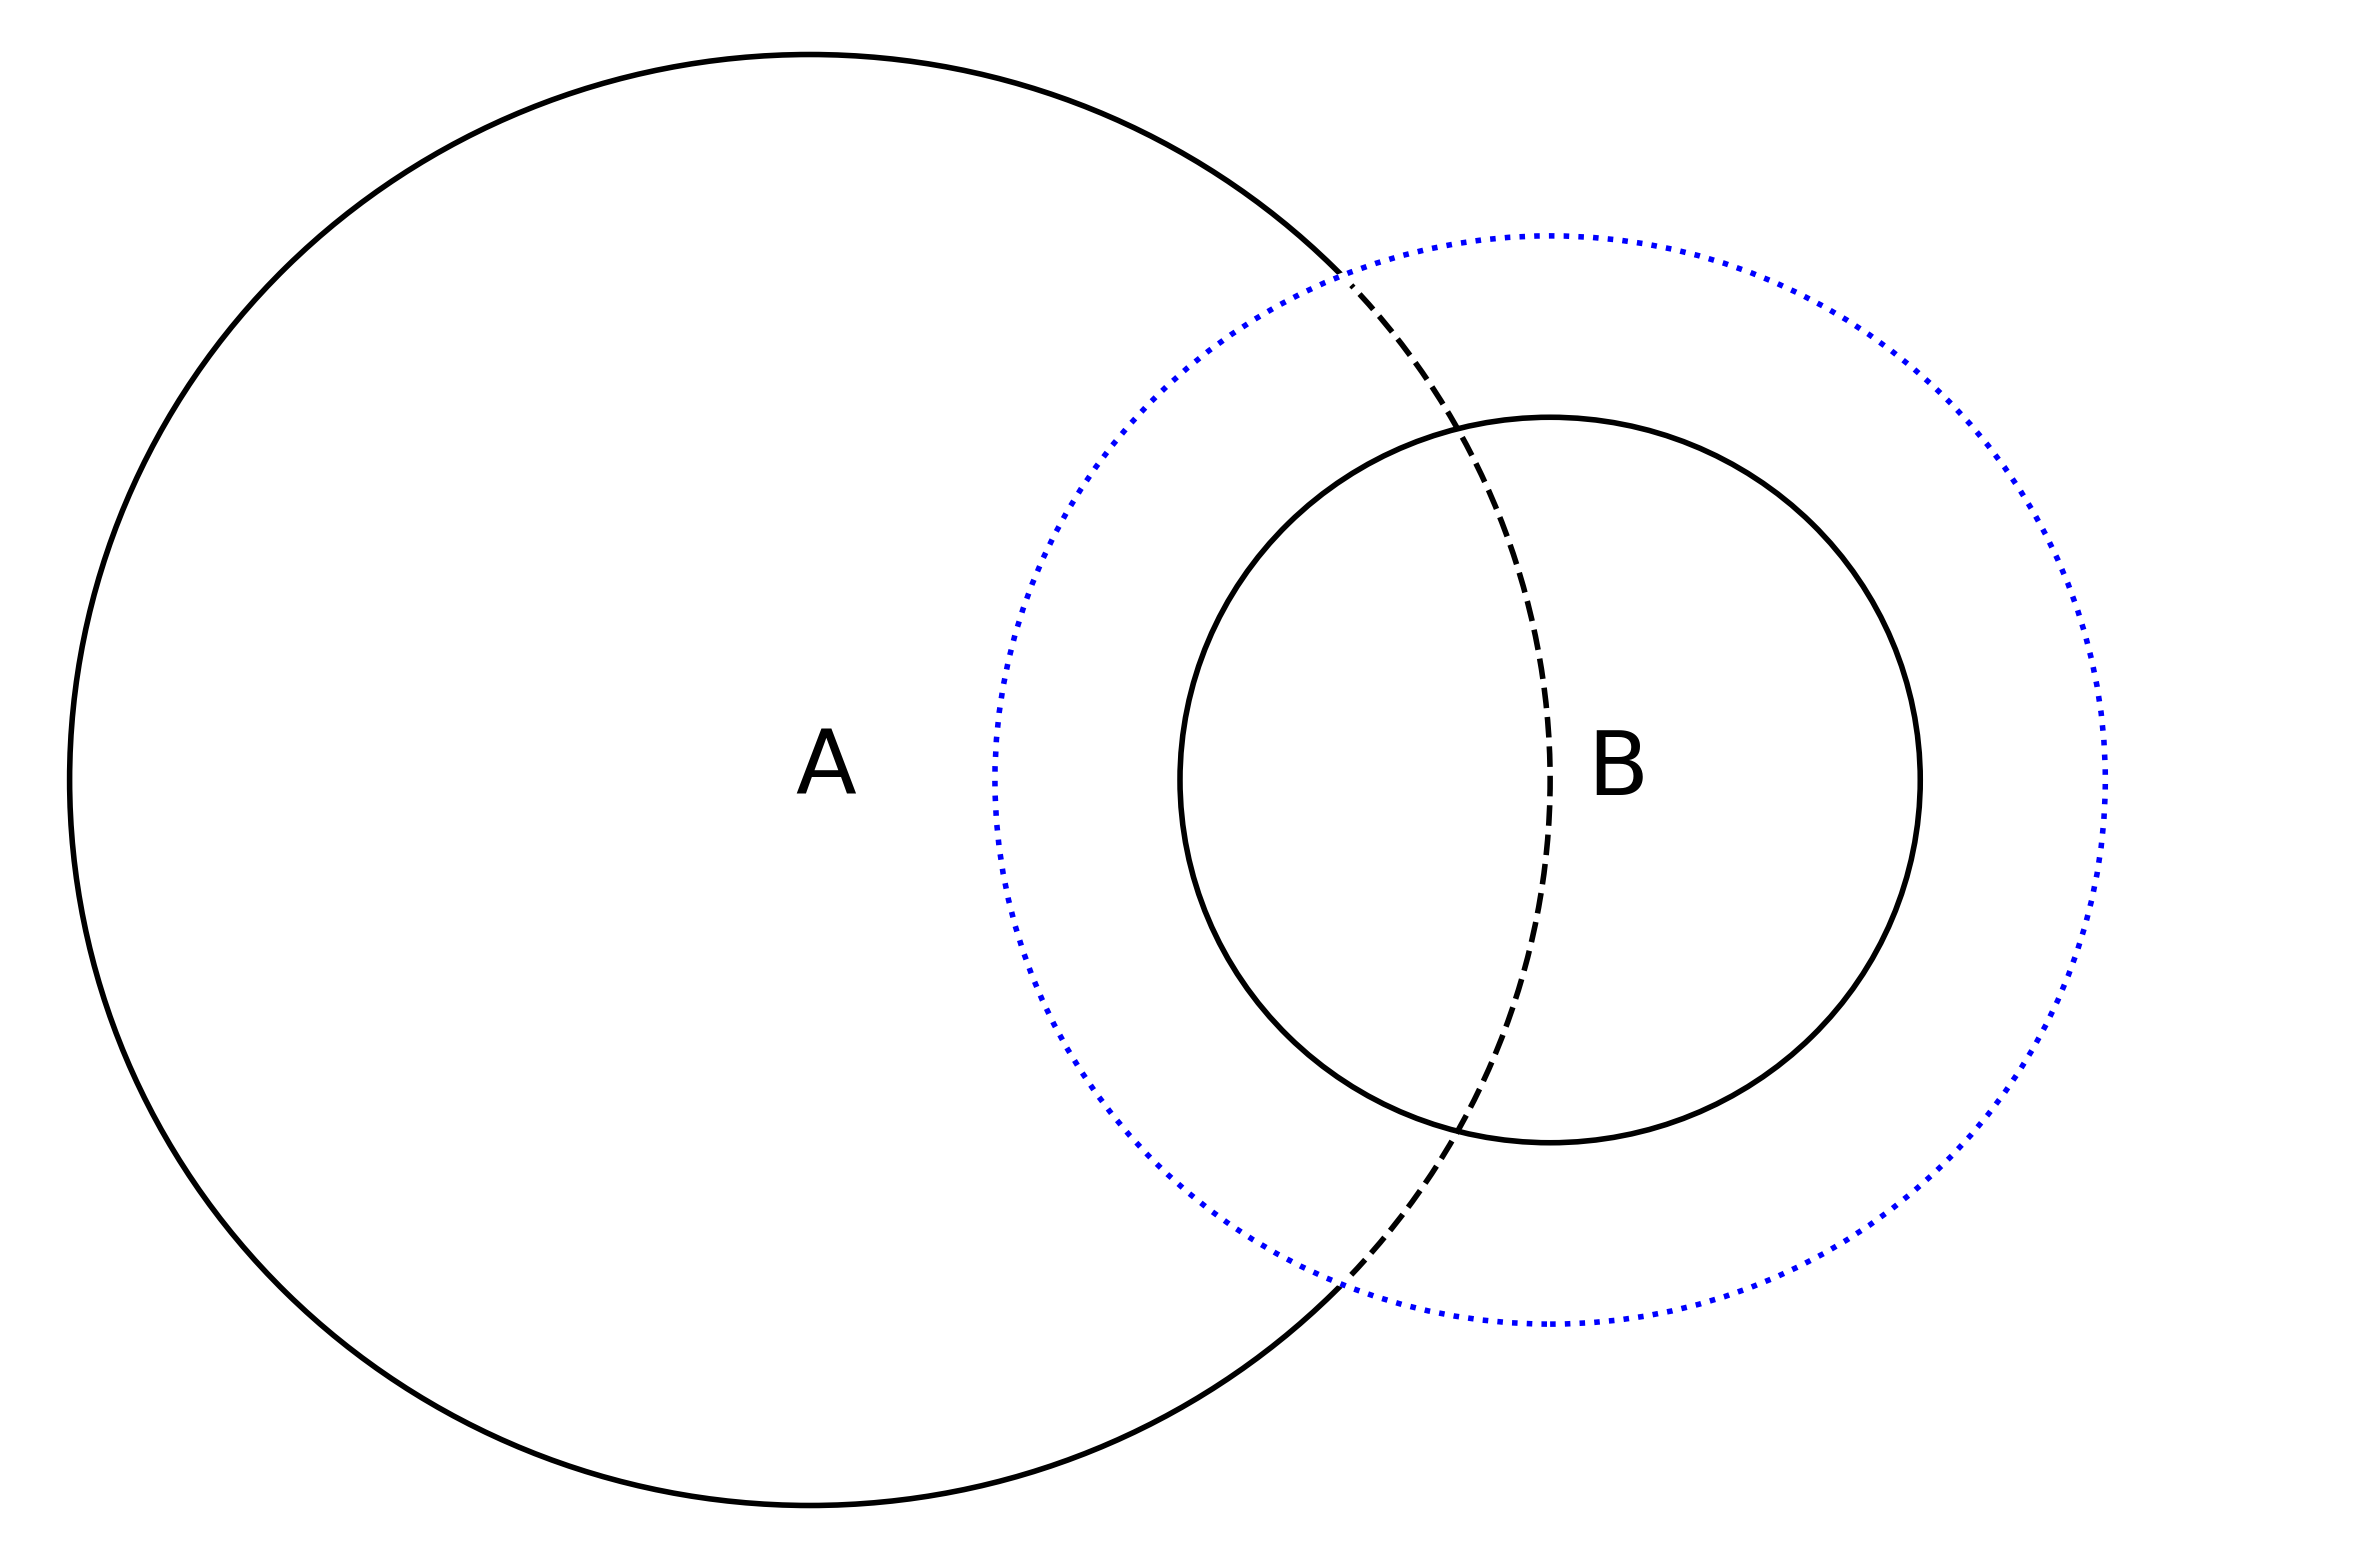

In [9]:
radius = 500

fig, ax = plt.subplots(figsize=(6, 4), dpi=dpi)
fig.set_tight_layout(True)

ax.set_xlim([-20, radius * 3 + 20])
ax.set_ylim([-10, radius * 2 + 10])
ax.axes.set_axis_off()

craters = [
    (radius, radius, radius, "black", 1, "-", False),
    (radius + radius, radius, radius*.75, "white", 1, "-", True),
    (radius + radius, radius, radius*.75, "blue", 1, "dotted", False),
    (radius + radius, radius, radius*.5, "black", 1, "-", False),
]

for x, y, r, color, alpha, ls, fill in craters:
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
arc = matplotlib.patches.Arc((radius, radius), radius*2, radius*2, theta1=-43, theta2=43, linestyle="dashed")
ax.add_patch(arc)
    
ax.text(radius-10, radius-10, "A", fontsize=16)
ax.text(radius + radius + 25, radius - 10, "B", fontsize=16)
plt.savefig("figures/cookie_cutting_with_effective_radius.svg", pad_inches=0)
plt.show()

### Demonstrating crater erasure effectiveness ratio

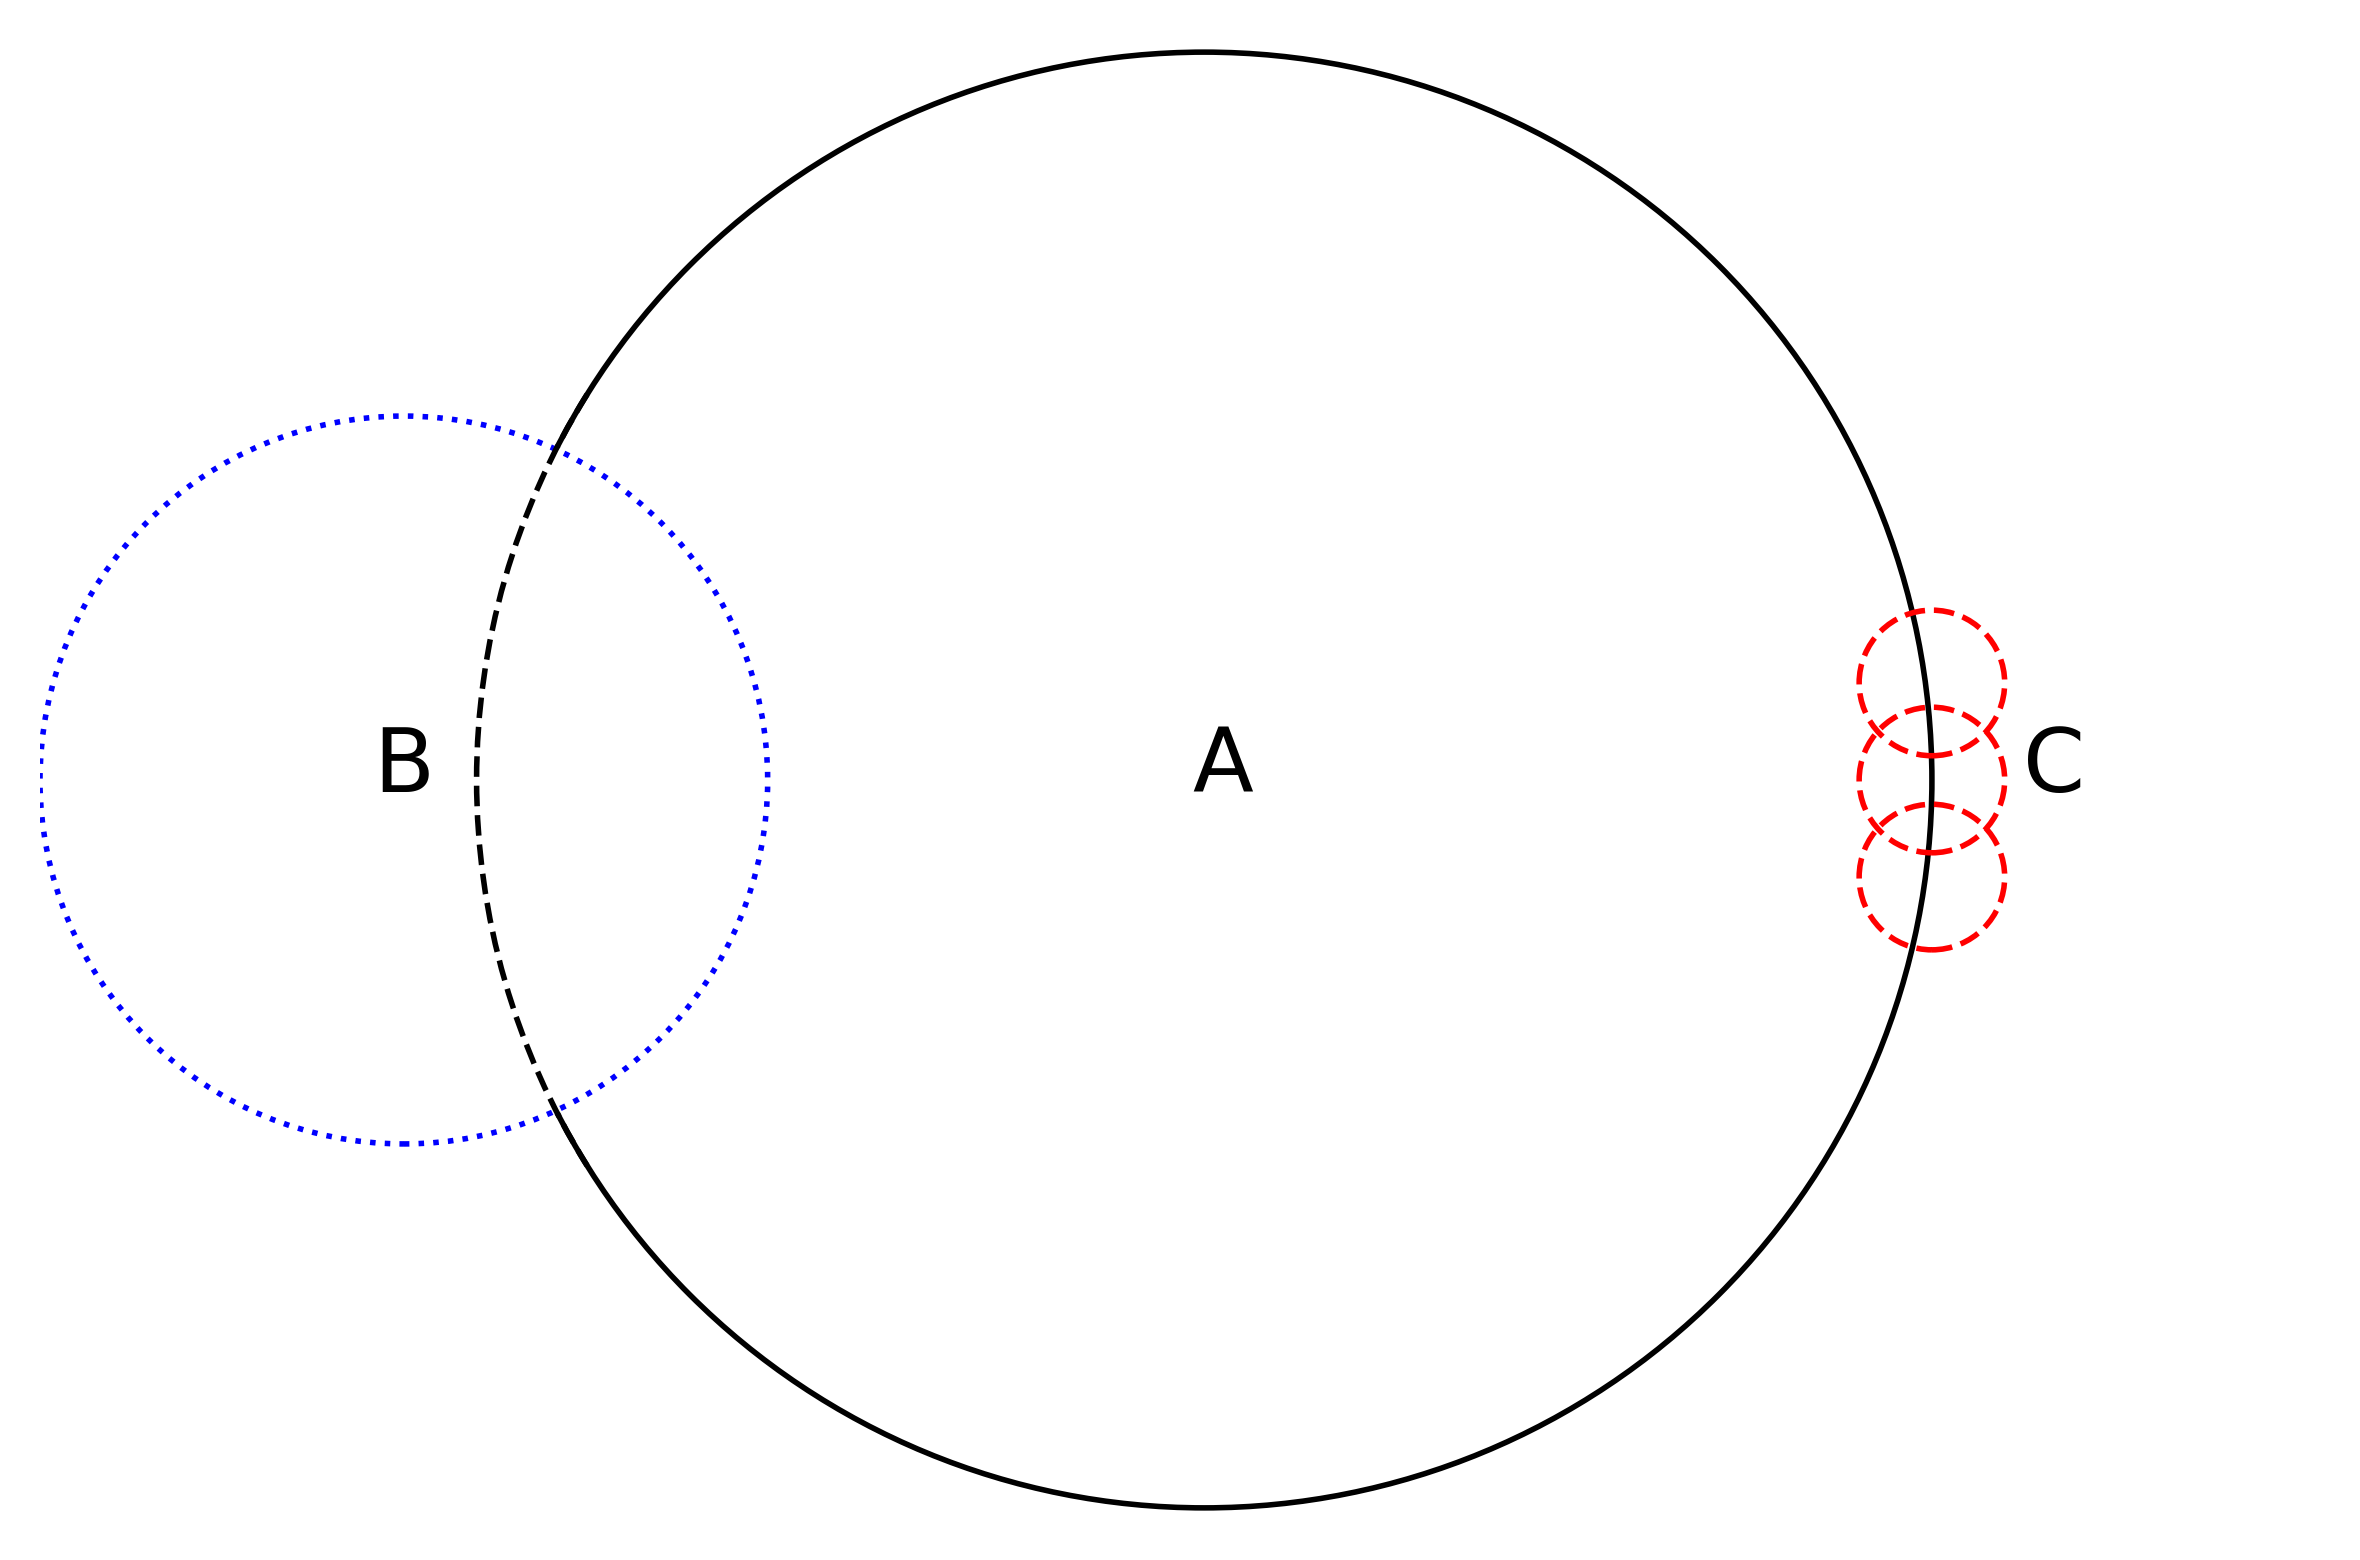

In [10]:
radius = 600

fig, ax = plt.subplots(figsize=(6, 4), dpi=dpi)
fig.set_tight_layout(True)

ax.set_xlim([-radius*1.6, radius*1.5 + 20])
ax.set_ylim([-radius - 10, radius + 10])
ax.axes.set_axis_off()

craters = [
    (0, 0, radius, "black", 1, "-", False),
    (radius, 0, 60, "red", 1, "--", False),
    (radius, 80, 60, "red", 1, "--", False),
    (radius, -80, 60, "red", 1, "--", False),
    (-radius - radius/10, 0, radius / 2, "white", 1, "-", True),
    (-radius - radius/10, 0, radius / 2, "blue", 1, "dotted", False),
]

for x, y, r, color, alpha, ls, fill in craters:
    plot_circle((x, y), r, ax, fill=fill, color=color, alpha=alpha, linestyle=ls)
    
arc = matplotlib.patches.Arc((0, 0), radius*2, radius*2, theta1=148, theta2=212, linestyle="dashed")
ax.add_patch(arc)
    
ax.text(-10, -10, "A", fontsize=16)
ax.text(-radius - 85, -10, "B", fontsize=16)
ax.text(radius + 75, -10, "C", fontsize=16)
plt.savefig("figures/crater_erasure_effectiveness_ratio.svg", pad_inches=0)
plt.show()

# Study region

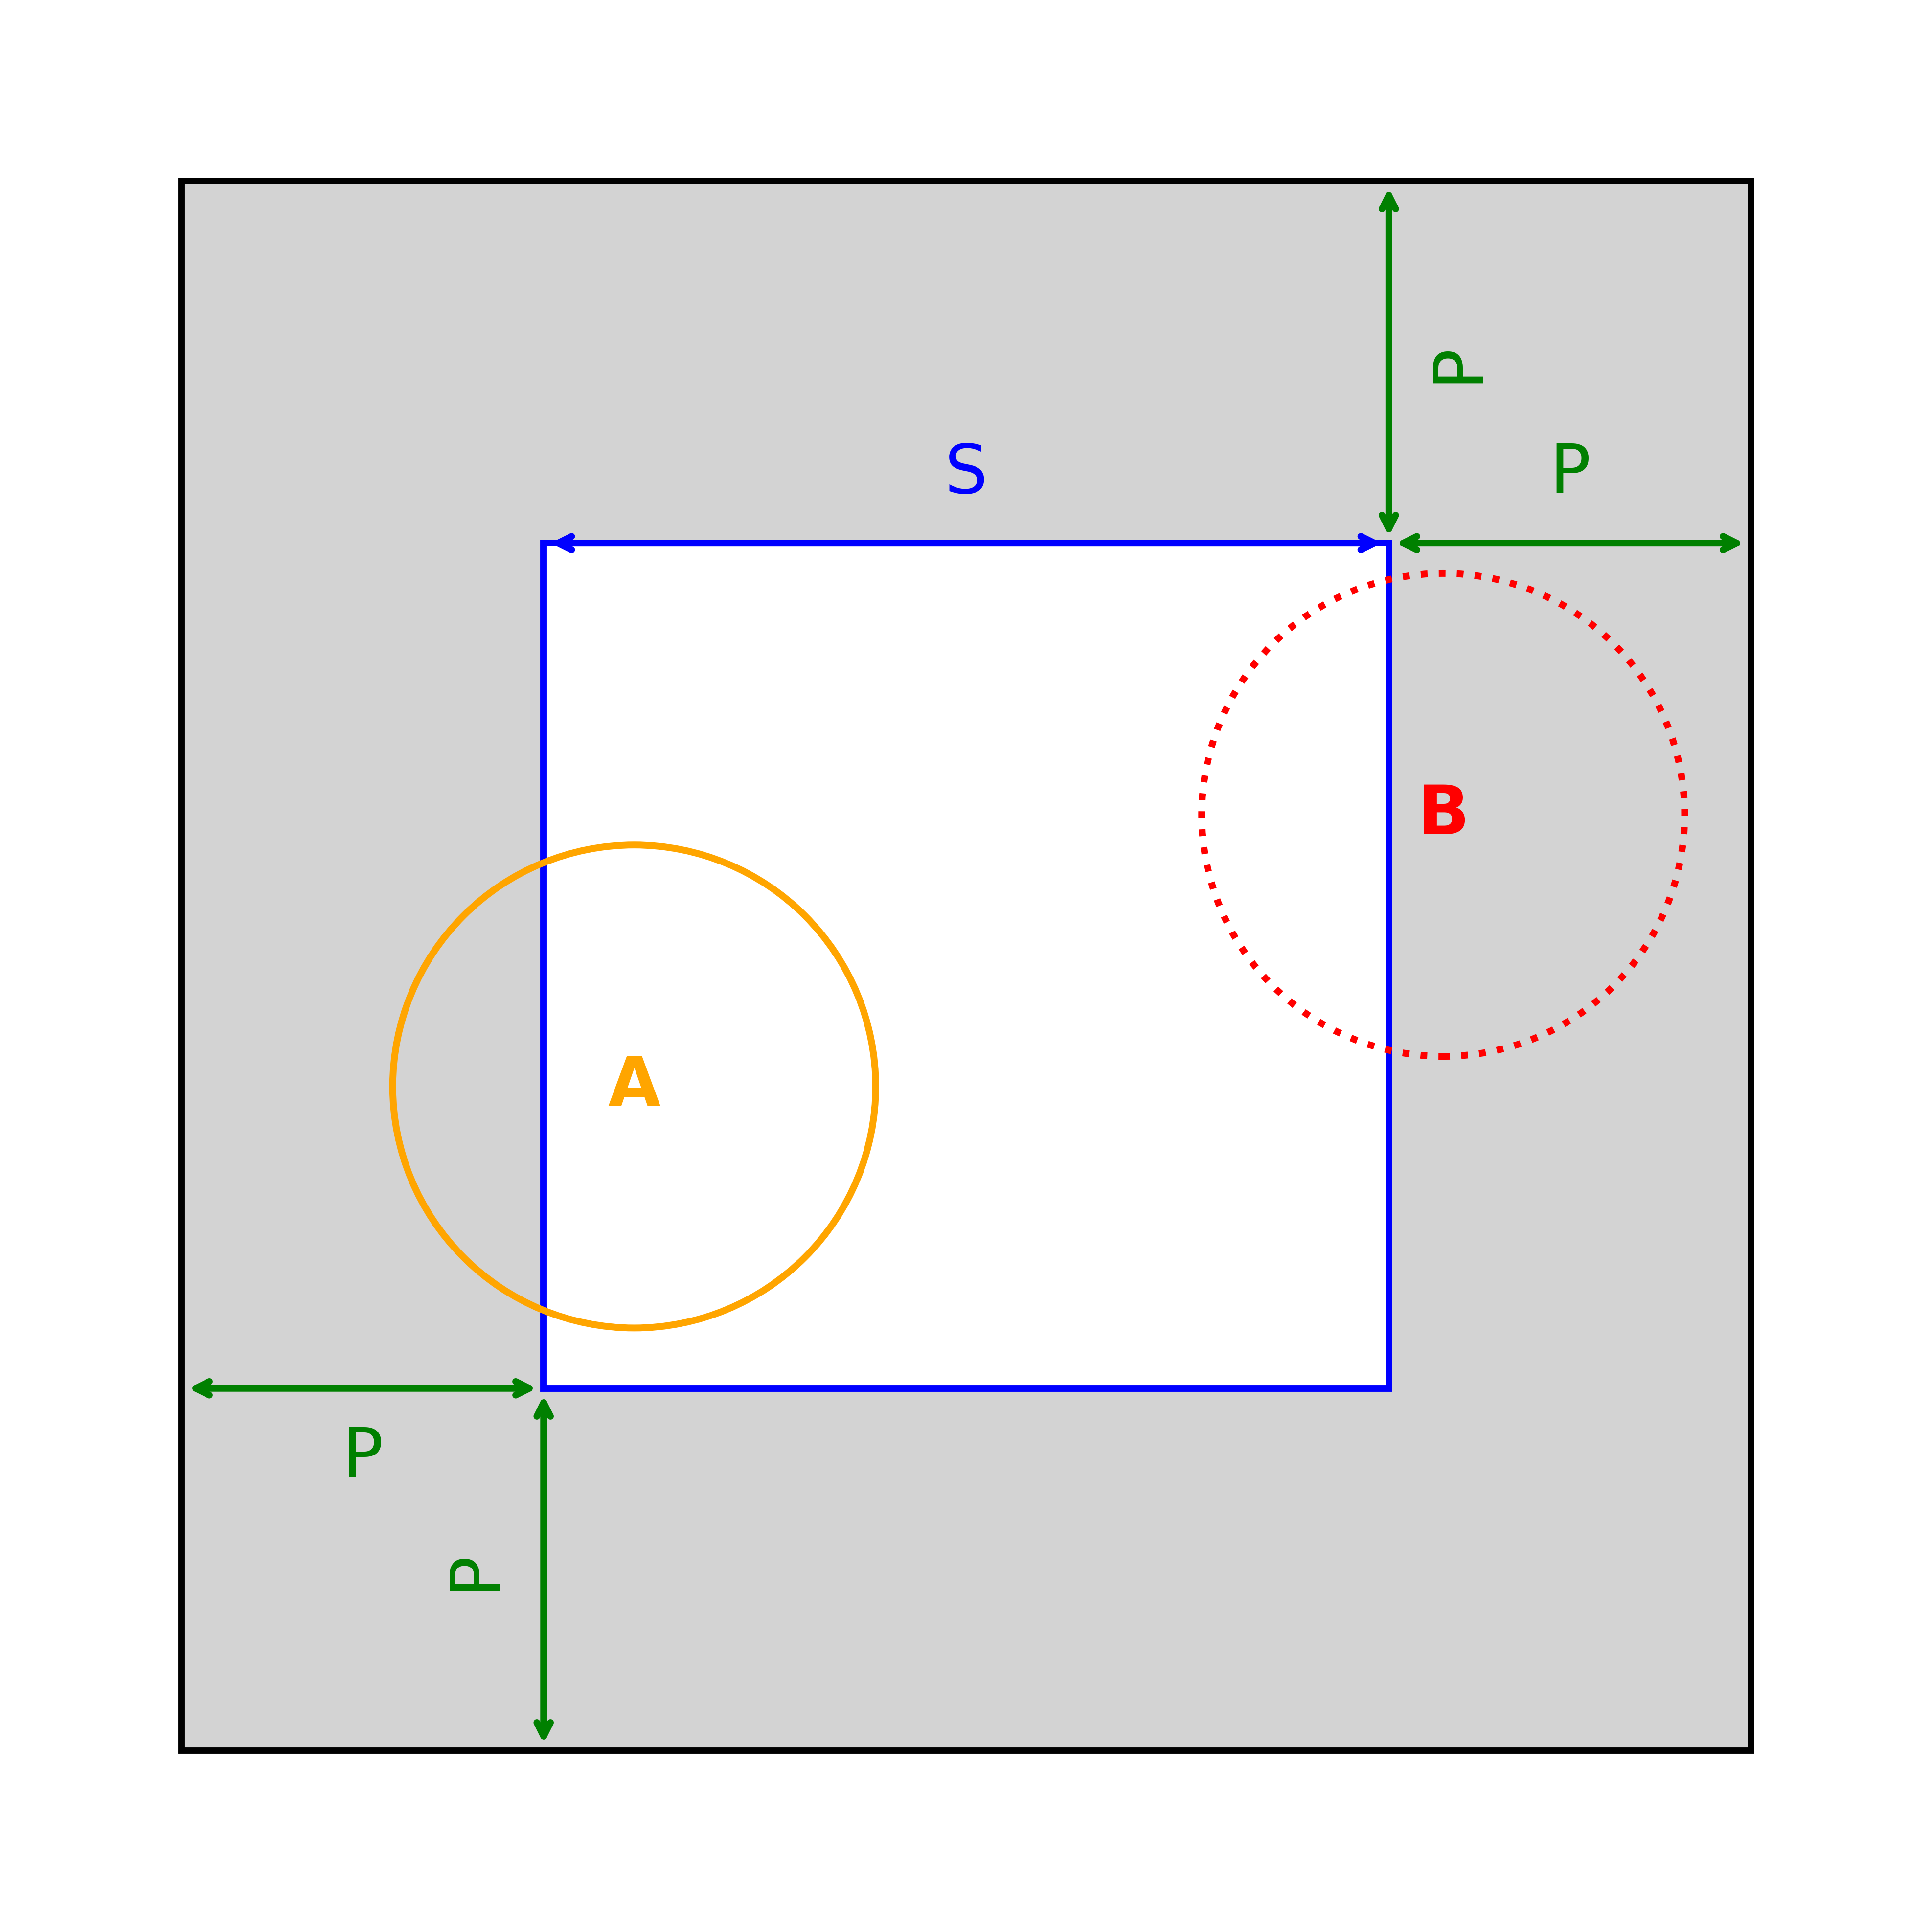

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

S = 700
P = 300
font_size = 20

# Calculate total surface size
total_size = S + 2 * P

fig, ax = plt.subplots(figsize=(8, 8), dpi=500)
fig.set_tight_layout(True)

# Create outer square (Total Surface) with light grey background
outer_square = patches.Rectangle((0, 0), total_size, total_size,
                                linewidth=2, edgecolor='black', facecolor='lightgrey')
ax.add_patch(outer_square)

# Create inner square (Study Region) with white background
study_square = patches.Rectangle((P, P), S, S,
                                linewidth=2, edgecolor='blue', facecolor='white')
ax.add_patch(study_square)

# ---------------------------
# Add Arrows and Labels
# ---------------------------

# 1. Arrow for S (Horizontal) - Top side of study region
ax.annotate('', xy=(P, P + S), xytext=(P + S, P + S),
            arrowprops=dict(arrowstyle='<->', color='blue', linewidth=2))
# Label for S
ax.text(P + S / 2, P + S + P * 0.1, 'S', ha='center', va='bottom',
        color='blue', fontsize=font_size)

# 2. Arrow for P (Left Padding - Horizontal)
ax.annotate('', xy=(0, P), xytext=(P, P),
            arrowprops=dict(arrowstyle='<->', color='green', linewidth=2))
# Label for P (Left Padding)
ax.text(P / 2, P - P * 0.1, 'P', ha='center', va='top',
        color='green', fontsize=font_size)

# 3. Arrow for P (Bottom Padding - Vertical)
ax.annotate('', xy=(P, 0), xytext=(P, P),
            arrowprops=dict(arrowstyle='<->', color='green', linewidth=2))
# Label for P (Bottom Padding)
ax.text(P - P * 0.1, P / 2, 'P', ha='right', va='center',
        color='green', fontsize=font_size, rotation=90)

# 4. Arrow for P (Right Padding - Horizontal)
ax.annotate('', xy=(P + S, P + S), xytext=(total_size, P + S),
            arrowprops=dict(arrowstyle='<->', color='green', linewidth=2))
# Label for P (Right Padding)
ax.text(P + S + (total_size - (P + S)) / 2, P + S + P * 0.1, 'P',
        ha='center', va='bottom', color='green', fontsize=font_size)

# 5. Arrow for P (Top Padding - Vertical)
ax.annotate('', xy=(P + S, P + S), xytext=(P + S, total_size),
            arrowprops=dict(arrowstyle='<->', color='green', linewidth=2))
# Label for P (Top Padding)
ax.text(P + S + P * 0.1, P + S + (total_size - (P + S)) / 2, 'P',
        ha='left', va='center', color='green', fontsize=font_size, rotation=90)

# ---------------------------
# Add Grid Lines
# ---------------------------
ax.set_xticks(range(0, int(total_size) + 1))
ax.set_yticks(range(0, int(total_size) + 1))
ax.grid(True, which='both', color='lightgrey', linestyle='--', linewidth=0.5)

# ---------------------------
# Final Plot Adjustments
# ---------------------------
# Set plot limits with some padding to prevent clipping
padding = total_size * 0.1
ax.set_xlim(-padding, total_size + padding)
ax.set_ylim(-padding, total_size + padding)

# Add craters
plot_circle(((1.25 * P), (S + P) - (1.5 * P)), 2 * P / 3, ax, color="orange", alpha=1.0, linestyle="solid", lw=2)
ax.text((1.25 * P), (S + P) - (1.5 * P), "A", fontsize=font_size, fontweight='bold', ha='center', va='center', color='orange')

plot_circle((S + 1.15 * P, S + 0.25 * P), 2 * P / 3, ax, color="red", alpha=1.0, linestyle="dotted", lw=2)
ax.text(S + 1.15 * P, S + 0.25 * P, "B", fontsize=font_size, fontweight='bold', ha='center', va='center', color='red')

# Ensure equal aspect ratio
ax.set_aspect('equal')

# Remove axes for a cleaner look
ax.axis('off')

plt.savefig("figures/study_and_padding_regions.svg", pad_inches=0)

# Display the plot
plt.show()